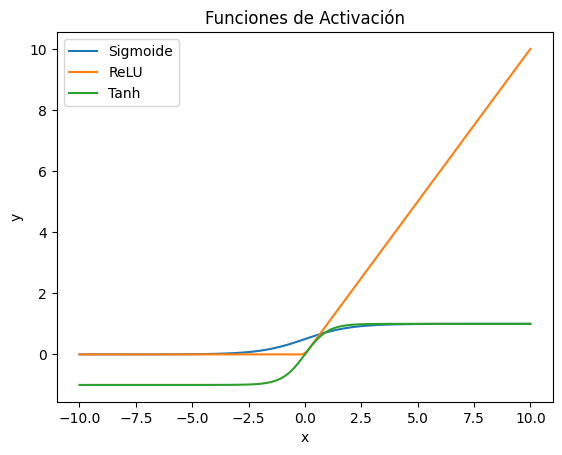

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.linspace(-10, 10, 100)

# Función sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Función ReLU
def relu(x):
    return np.maximum(0, x)

# Función tangente hiperbólica
def tanh(x):
    return np.tanh(x)

# Graficar las funciones de activación
plt.plot(x, sigmoid(x), label='Sigmoide')
plt.plot(x, relu(x), label='ReLU')
plt.plot(x, tanh(x), label='Tanh')

# Configurar el título y las etiquetas de los ejes
plt.title('Funciones de Activación')
plt.xlabel('x')
plt.ylabel('y')

# Mostrar la leyenda
plt.legend()

# Mostrar el gráfico
plt.show()


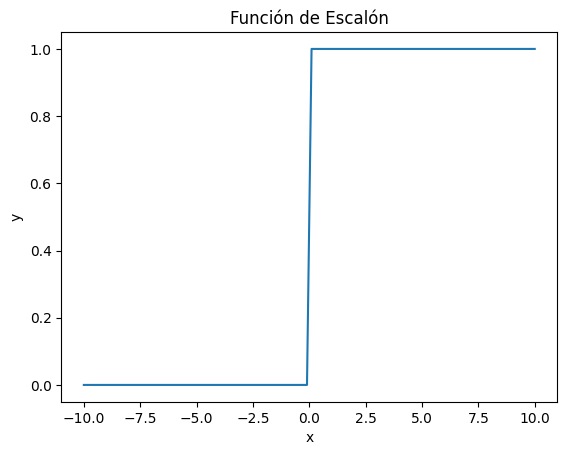

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Definir el rango de valores de x
x = np.linspace(-10, 10, 100)

# Función de escalón
def step_function(x):
    return np.where(x >= 0, 1, 0)

# Graficar la función de escalón
plt.plot(x, step_function(x))

# Configurar el título y las etiquetas de los ejes
plt.title('Función de Escalón')
plt.xlabel('x')
plt.ylabel('y')

# Mostrar el gráfico
plt.show()


In [ ]:
import numpy as np

# Definición de la función de activación sigmoide
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Definición de la derivada de la función de activación sigmoide
def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

# Clase de la red neuronal
class NeuralNetwork:
    def __init__(self, input_size, hidden_size, output_size):
        # Inicialización de los pesos aleatoriamente
        self.W1 = np.random.randn(hidden_size, input_size)
        self.b1 = np.zeros((hidden_size, 1))
        self.W2 = np.random.randn(output_size, hidden_size)
        self.b2 = np.zeros((output_size, 1))

    def forward_propagation(self, X):
        # Propagación hacia adelante
        self.z1 = np.dot(self.W1, X) + self.b1
        self.a1 = sigmoid(self.z1)
        self.z2 = np.dot(self.W2, self.a1) + self.b2
        self.a2 = sigmoid(self.z2)
        return self.a2

    def backward_propagation(self, X, y, output):
        # Propagación hacia atrás
        m = X.shape[1]

        # Gradiente en la capa de salida
        dZ2 = output - y
        dW2 = (1 / m) * np.dot(dZ2, self.a1.T)
        db2 = (1 / m) * np.sum(dZ2, axis=1, keepdims=True)

        # Gradiente en la capa oculta
        dZ1 = np.dot(self.W2.T, dZ2) * sigmoid_derivative(self.z1)
        dW1 = (1 / m) * np.dot(dZ1, X.T)
        db1 = (1 / m) * np.sum(dZ1, axis=1, keepdims=True)

        return dW1, db1, dW2, db2

    def train(self, X, y, learning_rate, epochs):
        for epoch in range(epochs):
            # Propagación hacia adelante
            output = self.forward_propagation(X)

            # Propagación hacia atrás y cálculo de los gradientes
            dW1, db1, dW2, db2 = self.backward_propagation(X, y, output)

            # Actualización de los pesos
            self.W1 -= learning_rate * dW1
            self.b1 -= learning_rate * db1
            self.W2 -= learning_rate * dW2
            self.b2 -= learning_rate * db2

# Datos de entrenamiento
X = np.array([[0, 0, 1, 1], [0, 1, 0, 1]])
y = np.array([[0, 1, 1, 0]])

# Creación de la red neuronal
input_size = 2
hidden_size = 2
output_size = 1
nn = NeuralNetwork(input_size, hidden_size, output_size)

# Entrenamiento de la red neuronal
learning_rate = 0.1
epochs = 10000
nn.train(X, y, learning_rate, epochs)

# Prueba de la red neuronal entrenada
output = nn.forward_propagation(X)
print("Salida predicha:")
print(output)


Salida predicha:
[[0.02333131 0.98107923 0.9811821  0.02129485]]
